In [885]:
#Declerations of global variables 

from Phidget22.Phidget import*

from Phidget22.Devices.Accelerometer import*
import time
import numpy as np
import matplotlib.pyplot as plt
import math

x=[]  #temporary vector to fill in phidget input for acceleration
t=[]  #temporary vector to fill in phidget input for time 
corrected_acc=[]  #corrected vector removing duplicate acceleration
corrected_dt=[]  #corected vector removing duplicate times
amag=[] #this stores the magnitude values of the acceleration
tilt=[]
g=9.81


run_time=2  #runtime for experiment

In [886]:
def writetocsv(arr,mag):
    w=np.array(mag)
    
    e1,e2=np.shape(arr)
    magnitude=np.reshape(w,(e1,1))
    a0=np.reshape(arr[:,0],(e1,1)) 
    a1=np.reshape(arr[:,1],(e1,1))   
    a2=np.reshape(arr[:,2],(e1,1))
    time=np.reshape(arr[:,3],(e1,1))
    accdata=np.hstack((a0,a1,a2,magnitude,time/1000))
    
    csvfile=np.savetxt('Accelerationdata.csv',accdata,delimiter=',',header='Ax,Ay,Az,Magnitude,Time')
     

In [887]:
#acceleration change event
def onaccelerationchange(self,acceleration,timestamp):
    global x
    global t
    for i in acceleration:
        x.append(acceleration)
        t.append(timestamp)
        

In [888]:
#channel opener and closer 
def main():    
    ch= Accelerometer()
    ch.setDeviceSerialNumber(372295)
    ch.setOnAccelerationChangeHandler(onaccelerationchange)
    
    ch.openWaitForAttachment(1000)
    time.sleep(run_time)
    ch.close()
    

In [889]:
def gravity_correction(inarr):
    global acceleration_array
    d1,d2=np.shape(inarr)
    ax=np.reshape(inarr[:,0],(d1,1)) #this limits the reshaping of the arrays exclusively to the time and size of array
                                        #needs to have feature of extracting the size for (12) cause 1 is always going to bethe same
    ay=np.reshape(inarr[:,1],(d1,1))    #tuple unpacking could be used 
    az=np.reshape(inarr[:,2]-1,(d1,1))
    dt=np.reshape(inarr[:,3],(d1,1))
    acceleration_array=np.hstack((ax*g,ay*g,az*g,dt))
    print(acceleration_array)

In [890]:
#calcalates the magnitude of the accleration using the ax, ay and az values 
def acceleration_magnitude(inarr):
    global amag
#input will be the corrected array after subtracting -1 from acceleration 
#need to slice open array and make room for new column 
    axx=inarr[:,0]
    ayy=inarr[:,1]
    azz=inarr[:,2]
    for i in range(0,len(axx)):
        d=(axx[i]**2)+(ayy[i]**2)+(azz[i]**2)
        m=math.sqrt(d)
        amag.append(m)
    

In [891]:
#array manipulation of acceleration data
def list_to_arr():
    
    global finarr
    acc=Vector_correction(x,t)
    accarr=np.array(acc.acceleration_corr())
    dtarr=np.array(acc.timestamp_corr())
    finarr=np.column_stack((accarr,dtarr)) #combines both the arrays into one
    
# this should have the option of putting this numpy arr into a csv file

In [892]:
#function to create plot for testing 
#plots will have x, y , z accelerations 

def plot_acceleration(inputarr):
    a0=inputarr[:,0]
    a1=inputarr[:,1]
    a2=inputarr[:,2]
    t=inputarr[:,3]
    plt.figure(figsize=(12,20))
    plt.subplot(411)    
    plt.plot(t,a2,'b', label='z axis acce')
    plt.legend()

    plt.subplot(412)
    plt.plot(t,a0,'y', label='x axis acce')
    plt.legend()
    plt.subplot(413)
    plt.plot(t,a1,'g', label='y axis acce')
    plt.legend()
    plt.subplot(414)
    plt.plot(t,a2,'b', label='z axis acce')
    plt.plot(t,a0,'y', label='x axis acce')
    plt.plot(t,a1,'g', label='y axis acce')
    plt.plot(t,amag,'r',label='Acceleration magnitude')
    plt.legend()
    plt.show()

In [893]:
def plottilt(inarr):
    arr=np.array(inarr)
    tiltx=arr[:,0]
    tilty=arr[:,1]
    
    plt.plot(tiltx,label='Tilt in x axis')
    plt.plot(tilty,label='Tilt in y axis')
    
    plt.legend()
    

In [894]:
def tiltangle(inarr):
    global tilt
    agx=inarr[:,0]/9.81
    agy=inarr[:,1]/9.81

    
    for i in range(0,len(agx)):
        t=[math.degrees(np.arcsin(agx[i])),math.degrees(np.arcsin(agy[i]))]
        t1,t2=t
        tmag=(t1**2)+(t2**2)
        rad=math.sqrt(tmag)
        t=[t1,t2,rad]
        tilt.append(t)
        
    


In [896]:
#creating a class to have accelearation and time corrected with array createad 
class Vector_correction:
    
    def __init__(self,acc,dt):
        self.acc=acc
        self.dt=dt
        
        
    def acceleration_corr(self):
        global corrected_acc
        # Also possible to use list(set())
        
        for a in self.acc:
            if a not in corrected_acc:
                corrected_acc.append(a)
                
        return corrected_acc
    
    def timestamp_corr(self):
        
        global corrected_dt
    
        for b in self.dt:
            if b not in corrected_dt:
                corrected_dt.append(b)
               
        return corrected_dt


[[   4.7467647    5.936031    -3.5491599    0.       ]
 [   4.7501001    5.9323032   -3.5479827    9.       ]
 [   4.7505906    5.9326956   -3.5493561  265.       ]
 [   4.7492172    5.9324013   -3.5496504  521.       ]
 [   4.7493153    5.9329899   -3.5486694  777.       ]
 [   4.7495115    5.9342652   -3.5493561 1033.       ]
 [   4.7488248    5.9336766   -3.5501409 1289.       ]
 [   4.749021     5.9333823   -3.5490618 1545.       ]]


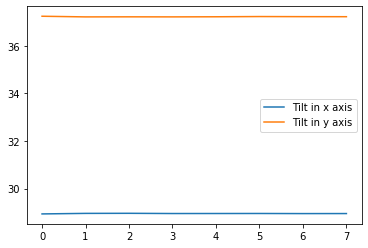

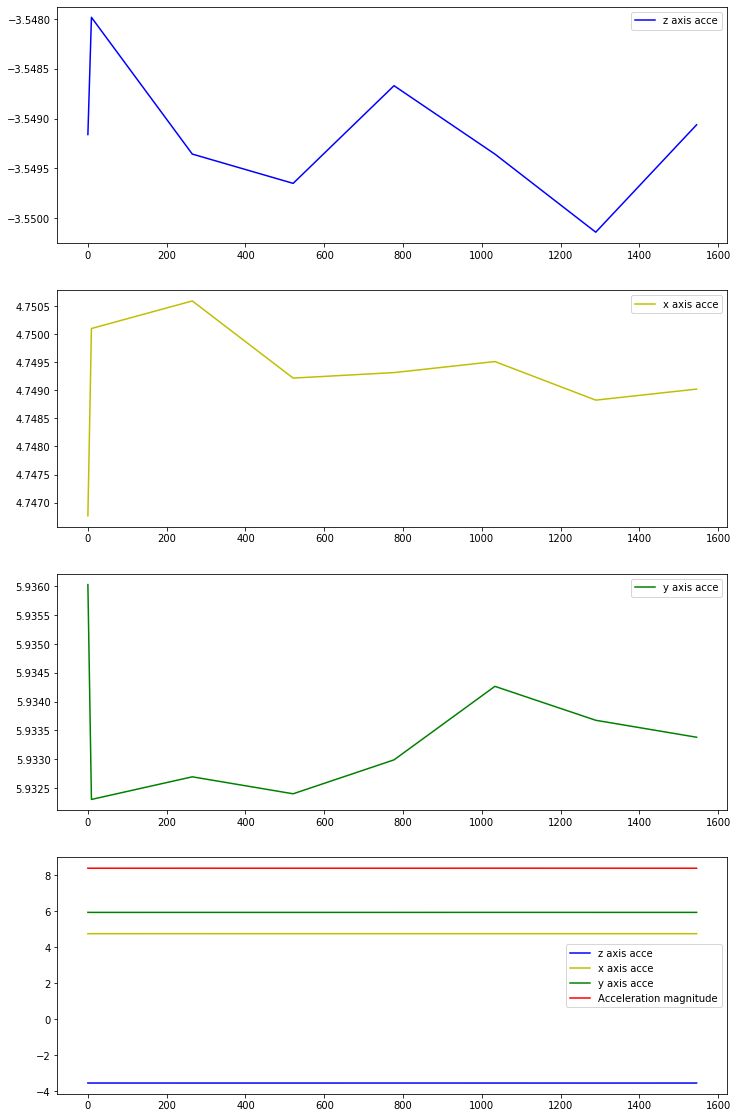

TypeError: onaccelerationchange() missing 3 required positional arguments: 'self', 'acceleration', and 'timestamp'

In [897]:
#main code that runs continuously as long as we run the script
try:
    main()
    onaccelerationchange()
finally: 
    list_to_arr()
    gravity_correction(finarr)
    acceleration_magnitude(acceleration_array)
    tiltangle(acceleration_array)
    plottilt(tilt)
    plot_acceleration(acceleration_array)
    writetocsv(acceleration_array,amag)